<a href="https://colab.research.google.com/github/Czyundream/Czyundream.github.io/blob/main/NOx_littledata_CLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import pandas as pd
from torch.utils import data
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython import display

In [2]:
!pip install -u -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded1 = drive.CreateFile({'id':'1tAuwwBCLdMveKfDy7giiJ9LopWDmYkze'})
downloaded1.GetContentFile('6月数据.xlsx')
downloaded2 = drive.CreateFile({'id':'1GEJ2od-g6jfHqKADJ4T-cPRv8i9KLLu9'})
downloaded2.GetContentFile('7月数据.xlsx')


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [45]:
#3月数据测试
!pip install -u -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded1 = drive.CreateFile({'id':'1AnA--AyKRCWLnSOYj6xnQMcpEgbhL220'})
downloaded1.GetContentFile('6-8.xlsx')
downloaded2 = drive.CreateFile({'id':'142Hij7E4mAw2-8kKJgHaErkRKSKi0lhs'})
downloaded2.GetContentFile('9-10.20.xlsx')
downloaded3 = drive.CreateFile({'id':'1hFcq4UhClURmbzmRa4hDbrCaRneodYpW'})
downloaded3.GetContentFile('10.28-1.28.xlsx')


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [ ]:
'Big_data'
!pip install -u -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded1 = drive.CreateFile({'id':'1uj28rA49bMoNie4f4oyNk97Np8iDkbja'})
downloaded1.GetContentFile('数据修正.xlsx')
downloaded2 = drive.CreateFile({'id':'1GR-_B8QA5_iO8CyMsBiU-QaU611li-H3'})
downloaded2.GetContentFile('测试集.xlsx')


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

df = pd.read_excel('数据修正.xlsx')
#df.plot(x = "时间",y = ["发电机功率(MW)","主蒸汽温度(℃)","NOX排放量(折算值,mg/m3)"],figsize=(10,6))
#plt.xticks(rotation=60);
dv = pd.read_excel('测试集.xlsx')

In [ ]:
#单月数据
data_train = pd.read_excel('6月数据.xlsx')
data_test = pd.read_excel('7月数据.xlsx')
data_test

In [46]:
#三月数据
data_train = pd.read_excel('6-8.xlsx')
data_test = pd.read_excel('9-10.20.xlsx')
data_val = pd.read_excel('10.28-1.28.xlsx')
data_test

,时间,发电机功率(MW),主汽压力(MPa),主蒸汽温度(℃),再热蒸汽温度(℃),总风量(t/h),总煤量(t),给水流量(t/h),水煤比,过热度(℃),"NOX排放量(折算值,mg/m3)",氧量(%),烟气流量(m3/h),烟气压力(kPa),烟气温度(℃)
0,2021-09-01 00:00:00,346.450317,15.699455,594.672058,582.872192,1342.546631,139.481888,925.862122,6.606353,32.834663,22.955072,8.258505,1489773.500,-0.060544,55.467323
1,2021-09-01 00:30:00,323.381653,14.697188,598.273376,590.340576,1303.893555,133.012436,844.037659,6.328496,31.054583,31.121881,8.803244,1469882.750,-0.086221,54.368633
2,2021-09-01 01:00:00,320.877197,14.539897,599.394653,591.368958,1307.535156,138.373001,873.218384,6.274511,33.196438,24.955420,9.356234,1503017.375,-0.082680,53.718105
3,2021-09-01 01:30:00,322.795807,14.795405,602.403503,592.997864,1333.242432,139.216965,852.583435,6.071786,35.564384,41.213367,9.088861,1517622.875,-0.062223,53.424347
4,2021-09-01 02:00:00,322.906067,14.864748,602.344177,589.759399,1245.312134,137.528305,840.303162,6.034456,37.453972,39.621517,8.721030,1374088.750,-0.073232,53.235947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,2021-10-20 19:30:00,289.895874,13.570211,536.696167,515.254944,1271.385132,130.284180,828.411499,6.392248,12.324538,43.831387,10.369009,1525543.250,-0.187812,51.595428
2309,2021-10-20 20:00:00,288.488464,13.597826,511.796387,507.750610,1239.381470,132.609344,815.807678,6.216131,12.646059,36.481659,10.219254,1469584.625,-0.186239,51.836246
2310,2021-10-20 20:30:00,250.332458,12.376331,499.975739,492.403351,1193.276733,109.592628,723.017517,6.640832,13.917417,44.114902,10.985283,1422035.500,-0.171790,51.986061
2311,2021-10-20 21:00:00,212.965027,9.747199,481.647766,477.207367,1108.997681,85.869858,633.817261,7.392653,5.615618,10.809449,12.072253,1475166.250,-0.167056,51.015919


In [ ]:
#全部数据
data_train = pd.read_excel('数据修正.xlsx')
data_test = pd.read_excel('测试集.xlsx')
data_test

FileNotFoundError: ignored

In [47]:
dt = data_train[['主汽压力(MPa)','发电机功率(MW)','主蒸汽温度(℃)','再热蒸汽温度(℃)','总风量(t/h)','总煤量(t)','给水流量(t/h)','水煤比','过热度(℃)','氧量(%)','烟气流量(m3/h)','烟气压力(kPa)','烟气温度(℃)','NOX排放量(折算值,mg/m3)']]
dv = data_test[['主汽压力(MPa)','发电机功率(MW)','主蒸汽温度(℃)','再热蒸汽温度(℃)','总风量(t/h)','总煤量(t)','给水流量(t/h)','水煤比','过热度(℃)','氧量(%)','烟气流量(m3/h)','烟气压力(kPa)','烟气温度(℃)','NOX排放量(折算值,mg/m3)']]
d_v_hold = data_val[['主汽压力(MPa)','发电机功率(MW)','主蒸汽温度(℃)','再热蒸汽温度(℃)','总风量(t/h)','总煤量(t)','给水流量(t/h)','水煤比','过热度(℃)','氧量(%)','烟气流量(m3/h)','烟气压力(kPa)','烟气温度(℃)','NOX排放量(折算值,mg/m3)']]
#dt_l = data_train[['NOX排放量(折算值,mg/m3)']]
#dv_l = data_test[['NOX排放量(折算值,mg/m3)']]
dv

,主汽压力(MPa),发电机功率(MW),主蒸汽温度(℃),再热蒸汽温度(℃),总风量(t/h),总煤量(t),给水流量(t/h),水煤比,过热度(℃),氧量(%),烟气流量(m3/h),烟气压力(kPa),烟气温度(℃),"NOX排放量(折算值,mg/m3)"
0,15.699455,346.450317,594.672058,582.872192,1342.546631,139.481888,925.862122,6.606353,32.834663,8.258505,1489773.500,-0.060544,55.467323,22.955072
1,14.697188,323.381653,598.273376,590.340576,1303.893555,133.012436,844.037659,6.328496,31.054583,8.803244,1469882.750,-0.086221,54.368633,31.121881
2,14.539897,320.877197,599.394653,591.368958,1307.535156,138.373001,873.218384,6.274511,33.196438,9.356234,1503017.375,-0.082680,53.718105,24.955420
3,14.795405,322.795807,602.403503,592.997864,1333.242432,139.216965,852.583435,6.071786,35.564384,9.088861,1517622.875,-0.062223,53.424347,41.213367
4,14.864748,322.906067,602.344177,589.759399,1245.312134,137.528305,840.303162,6.034456,37.453972,8.721030,1374088.750,-0.073232,53.235947,39.621517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,13.570211,289.895874,536.696167,515.254944,1271.385132,130.284180,828.411499,6.392248,12.324538,10.369009,1525543.250,-0.187812,51.595428,43.831387
2309,13.597826,288.488464,511.796387,507.750610,1239.381470,132.609344,815.807678,6.216131,12.646059,10.219254,1469584.625,-0.186239,51.836246,36.481659
2310,12.376331,250.332458,499.975739,492.403351,1193.276733,109.592628,723.017517,6.640832,13.917417,10.985283,1422035.500,-0.171790,51.986061,44.114902
2311,9.747199,212.965027,481.647766,477.207367,1108.997681,85.869858,633.817261,7.392653,5.615618,12.072253,1475166.250,-0.167056,51.015919,10.809449


In [8]:
d_x_V = data_test[['主汽压力(MPa)','发电机功率(MW)','主蒸汽温度(℃)','再热蒸汽温度(℃)','总风量(t/h)','总煤量(t)','给水流量(t/h)','水煤比','过热度(℃)','氧量(%)','烟气流量(m3/h)','烟气压力(kPa)','烟气温度(℃)','NOX排放量(折算值,mg/m3)']]
d_y_V = data_test[['NOX排放量(折算值,mg/m3)']]

In [9]:
def filter_extreme_3sigma(dataframe,n=3):
    # 3sigma 去极值
    for i in dataframe.columns:
        mean=dataframe[i].mean()
        std=dataframe[i].std()
        max_range=mean+n*std
        min_range=mean-n*std
        dataframe[i] = pd.DataFrame(np.clip(dataframe[i].values, min_range, max_range), columns=None)
    return dataframe

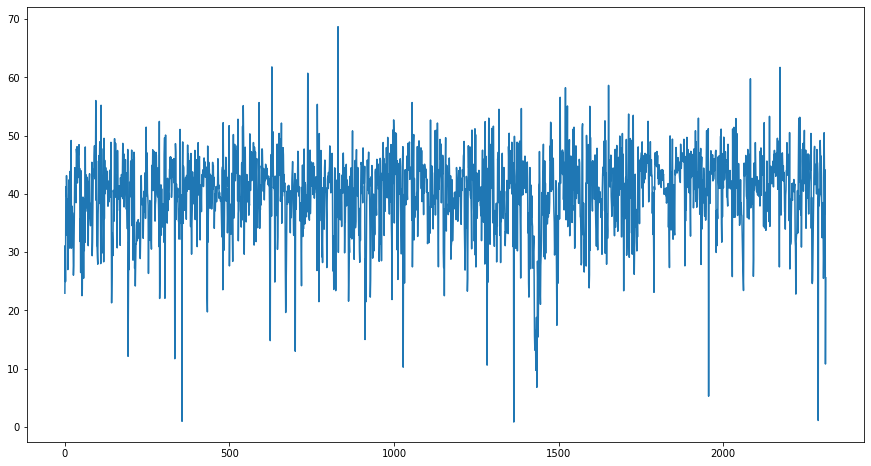

In [ ]:
import matplotlib.pyplot as plt
plt.figure(num=3, figsize=(15,8))
plt.plot(dv['NOX排放量(折算值,mg/m3)'])

In [14]:
len(dt)

4160

In [13]:
dv_n = filter_extreme_3sigma(dv)
dt_n = filter_extreme_3sigma(dt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
len(dt_n)

4160

In [ ]:
#不归一化数据
sdata_trainf_new = dt.to_numpy()
sdata_trainf_new = torch.from_numpy(sdata_trainf_new).to(torch.float32)


sdata_valuef_new=dv.to_numpy()
sdata_valuef_new=torch.from_numpy(sdata_valuef_new).to(torch.float32)
sdata_valuef_new

tensor([[ 1.4918e+01,  3.2489e+02,  6.0196e+02,  ..., -6.0103e-02,
          4.6399e+01,  4.1101e+01],
        [ 1.4476e+01,  3.1817e+02,  5.9803e+02,  ..., -6.2507e-02,
          4.5658e+01,  3.4421e+01],
        [ 1.4952e+01,  3.2354e+02,  5.9871e+02,  ..., -7.8830e-02,
          4.5103e+01,  4.7491e+01],
        ...,
        [ 6.7762e+00,  1.2966e+02,  3.4835e+02,  ..., -1.2055e-01,
          3.9962e+01,  2.6854e+01],
        [ 5.3485e+00,  1.0786e+02,  3.3919e+02,  ..., -1.1942e-01,
          3.8941e+01,  3.0788e+01],
        [ 4.9784e+00,  1.0713e+02,  3.3003e+02,  ..., -1.1817e-01,
          3.8791e+01,  3.4716e+01]])

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
scaler3 = MinMaxScaler()
scaler4 = MinMaxScaler()

model_tf=scaler1.fit(dt)
model_vf=scaler2.fit(dv)
model_testf=scaler3.fit(d_v_hold)
#v_x=scaler3.fit(d_x_V)
#v_y=scaler4.fit(d_y_V)


sdata_trainf = model_tf.transform(dt)
sdata_valuef = model_vf.transform(dv)
sdata_testf = model_testf.transform(d_v_hold)
#sdata_x = v_x.transform(d_x_V)
#sdata_y = v_y.transform(d_y_V)

# print scaled features
#print(sdata_trainf)


In [49]:
sdata_trainf=torch.from_numpy(sdata_trainf)
sdata_trainf=sdata_trainf.to(torch.float32)


sdata_valuef=torch.from_numpy(sdata_valuef)
sdata_valuef=sdata_valuef.to(torch.float32)

sdata_testf=torch.from_numpy(sdata_testf)
sdata_testf=sdata_testf.to(torch.float32)
#sdata_x=torch.from_numpy(sdata_x)
#sdata_x=sdata_x.to(torch.float32)

#sdata_y=torch.from_numpy(sdata_y)
#sdata_y=sdata_y.to(torch.float32)

In [18]:
def load_array(data_arrays, batchsize = 20, is_train=False):
    '''构造一个PyTorch数据迭代器'''
    dataset = data.TensorDataset(*data_arrays)#将数据转为dataset，*表示将元组拆解为一维数字作为传入参数
    '''
    #拆分训练集与预测集
    num_train = int(len(dataset)*0.8)
    num_valid = len(dataset) - num_train
    ds_train,ds_valid = data.random_split(dataset,[num_train,num_valid])
    '''
    data_iter = data.DataLoader(dataset, batch_size = batchsize, shuffle=is_train, drop_last=True)
    #return data.DataLoader(dataset, batch_size, shuffle=is_train)
    #将dataset型数据挑选batch_size大小的样本，shuffle控制是否打乱
    return data_iter

In [19]:
def LSTM_Data_precesing(pre_length, mem_data_time, features, labels):
    '''LSTM数据预处理函数，归一化与构造数据迭代器'''
    
    '''
    #归一化处理
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    sca_X = scaler.fit(features)
    New_X = scaler.transform(features)
    New_X = torch.from_numpy(New_X)
    '''
    #构造特征向量X
    #mem_data_time = 5

    from collections import deque
    deq = deque(maxlen=mem_data_time)

    X=[]
    for i in features:
        deq.append(list(i))
        if len(deq)==mem_data_time:
            X.append(list(deq))
    
    #构造特征向量y--labels
    y = labels[mem_data_time-1:]
    #print(len(X))
    print(y.shape)
    '''
    for  j in  range(len(features)-mem_data_time):
        y = labels[j+mem_data_time]
    '''
    variablex = torch.tensor(X, dtype=torch.float32)
    variabley = torch.tensor(y, dtype=torch.float32)
    data_train_iter = load_array((variablex, variabley), pre_length)

    #next(iter(data_iter))
    return data_train_iter

In [50]:
batch_size = 20
mem_data_time = 4
data_train_iter = LSTM_Data_precesing(batch_size, mem_data_time, sdata_trainf, sdata_trainf[:,13].reshape(-1,1))
data_val_iter = LSTM_Data_precesing(batch_size, mem_data_time, sdata_valuef, sdata_valuef[:,13].reshape(-1,1))
data_test_iter = LSTM_Data_precesing(batch_size, mem_data_time, sdata_testf, sdata_testf[:,13].reshape(-1,1))
print(next(iter(data_val_iter)))

torch.Size([4157, 1])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([2310, 1])
torch.Size([4444, 1])
[tensor([[[0.3853, 0.4778, 0.9166,  ..., 0.6694, 0.6218, 0.3258],
         [0.3340, 0.4382, 0.9389,  ..., 0.5927, 0.5578, 0.4462],
         [0.3260, 0.4339, 0.9458,  ..., 0.6033, 0.5200, 0.3553],
         [0.3391, 0.4372, 0.9645,  ..., 0.6644, 0.5029, 0.5950]],

        [[0.3340, 0.4382, 0.9389,  ..., 0.5927, 0.5578, 0.4462],
         [0.3260, 0.4339, 0.9458,  ..., 0.6033, 0.5200, 0.3553],
         [0.3391, 0.4372, 0.9645,  ..., 0.6644, 0.5029, 0.5950],
         [0.3426, 0.4374, 0.9641,  ..., 0.6315, 0.4919, 0.5715]],

        [[0.3260, 0.4339, 0.9458,  ..., 0.6033, 0.5200, 0.3553],
         [0.3391, 0.4372, 0.9645,  ..., 0.6644, 0.5029, 0.5950],
         [0.3426, 0.4374, 0.9641,  ..., 0.6315, 0.4919, 0.5715],
         [0.3294, 0.4375, 0.9611,  ..., 0.5979, 0.4896, 0.6233]],

        ...,

        [[0.6429, 0.6920, 0.9202,  ..., 0.6394, 0.5927, 0.6016],
         [0.8942, 0.9235, 0.9447,  ..., 0.5739, 0.6264, 0.6485],
         [0.9597, 0.9955,

In [ ]:
sdata_trainf[8,13].reshape(1)

tensor([0.0899])

In [ ]:
#未经过归一化数据集
import torch 
from torch import nn 
from torch.utils.data import Dataset,DataLoader,TensorDataset

WINDOW_SIZE = 5

class GL_Dataset(Dataset):
    def __len__(self):
        return len(sdata_trainf_new) - WINDOW_SIZE
    
    def __getitem__(self,i):
        x = sdata_trainf_new[i:i+WINDOW_SIZE-1,:]
        feature = torch.tensor(x)
        y = sdata_trainf_new[i+WINDOW_SIZE,13].reshape(1)
        label = torch.tensor(y)
        return (feature,label)

class GL_Dataset_v(Dataset):
    def __len__(self):
        return len(sdata_valuef_new) - WINDOW_SIZE
    
    def __getitem__(self,i):
        x1 = sdata_valuef_new[i:i+WINDOW_SIZE-1,:]
        feature1 = torch.tensor(x1)
        y1 = sdata_valuef_new[i+WINDOW_SIZE,13].reshape(1)
        label1 = torch.tensor(y1)
        return (feature1, label1)
ds_train = GL_Dataset()
ds_test = GL_Dataset_v()


d_train = DataLoader(ds_train, batch_size = 64 ,shuffle=True, drop_last=True)
d_test = DataLoader(ds_test, batch_size = 64, shuffle=True, drop_last=True)

In [ ]:
import torch 
from torch import nn 
from torch.utils.data import Dataset,DataLoader,TensorDataset

WINDOW_SIZE = 5

class GL_Dataset(Dataset):
    def __len__(self):
        return len(sdata_trainf) - WINDOW_SIZE
    
    def __getitem__(self,i):
        x = sdata_trainf[i:i+WINDOW_SIZE-1,:]
        feature = torch.tensor(x)
        y = sdata_trainf[i+WINDOW_SIZE,13].reshape(1)
        label = torch.tensor(y)
        return (feature,label)

class GL_Dataset_v(Dataset):
    def __len__(self):
        return len(sdata_valuef) - WINDOW_SIZE
    
    def __getitem__(self,i):
        x1 = sdata_valuef[i:i+WINDOW_SIZE-1,:]
        feature1 = torch.tensor(x1)
        y1 = sdata_valuef[i+WINDOW_SIZE,13].reshape(1)
        label1 = torch.tensor(y1)
        return (feature1, label1)
ds_train = GL_Dataset()
ds_test = GL_Dataset_v()


d_train = DataLoader(ds_train, batch_size = 64 ,shuffle=True, drop_last=True)
d_test = DataLoader(ds_test, batch_size = 64, shuffle=True, drop_last=True)

In [ ]:
next(iter(d_test))

NameError: ignored

In [56]:
class LSTM_baseline(nn.Module):
    @staticmethod
    def weight_init(m):
        # 1. 根据网络层的不同定义不同的初始化方式  
        if isinstance(m, nn.Linear):
            nn.init.xavier_normal_(m.weight)
            nn.init.constant_(m.bias, 0)
        # 也可以判断是否为conv2d，使用相应的初始化方式 
        elif isinstance(m, nn.LSTM):
            for name, param in m.named_parameters():
                if name.startswith("weight"):
                    nn.init.xavier_normal_(param)
                else  :
                    nn.init.zeros_(param)
        # 是否为批归一化层
        elif isinstance(m, nn.BatchNorm2d):
            nn.init.constant_(m.weight, 1)
            nn.init.constant_(m.bias, 0)

    def __init__(self, num_feature, hidden_num, hidden_num2, mem_time):
        super().__init__()

        self.num_feature = num_feature
        self.hidden_num = hidden_num
        self.hidden_num2 = hidden_num2
        self.batch_size = batch_size
        self.num_layers = 1
        self.mem_time = mem_time #2-7

        self.lstm = nn.LSTM(input_size = num_feature , hidden_size = hidden_num, batch_first = True, num_layers = 1, dropout = 0.2)#不适用dropout
        #self.lstm2 = nn.LSTM(input_size = hidden_num , hidden_size = hidden_num2, batch_first = True, num_layers = 1)
        self.dropout = nn.Dropout(0.2)
        #self.flatten = nn.Flatten(1, 2)
        self.linear = nn.Linear(hidden_num , 1)
        self.relu = nn.ReLU()
        
        self.apply(self.weight_init)
    
    def forward(self, X):
        #第一层
        hidden1,_= self.lstm(X)
        #print("hidden1的shape",h_1.shape)
        out1_relu = self.relu(hidden1)
        #print("hidden1_Drop的shape",hidden1_drop.shape)

        #第二层
        #hidden2 = self.lstm2(hidden1_drop)
        #out2_relu = self.relu(hidden2)
        #hidden2_drop = self.dropout(out2_relu)

        #输出层
    
        #print("flatten_hidden的shape",flatten_hidden.shape)
        pre = self.linear(out1_relu)
        pre = pre[:,-1,:]
        #print(pre.shape)
        return pre

In [42]:
class CNN_LSTM(nn.Module):
    @staticmethod
    def weight_init(m):
        # 1. 根据网络层的不同定义不同的初始化方式  
        if isinstance(m, nn.Linear):
            nn.init.xavier_normal_(m.weight)
            nn.init.constant_(m.bias, 0)
        # 也可以判断是否为conv2d，使用相应的初始化方式 
        elif isinstance(m, nn.LSTM):
            for name, param in m.named_parameters():
                if name.startswith("weight"):
                    nn.init.xavier_normal_(param)
                else  :
                    nn.init.zeros_(param)
        # 是否为批归一化层
        elif isinstance(m, nn.BatchNorm2d):
            nn.init.constant_(m.weight, 1)
            nn.init.constant_(m.bias, 0)

    def __init__(self, num_feature, hidden_num, hidden_num2, mem_time, out_channels):
        super(CNN_LSTM, self).__init__()
        self.out_channels = out_channels
        self.num_feature = num_feature
        self.hidden_num = hidden_num
        self.hidden_num2 = hidden_num2
        self.batch_size = batch_size
        self.num_layers = 1
        self.mem_time = mem_time #2-7

        self.conv = nn.Sequential(
            nn.Conv1d(in_channels = 4, out_channels=out_channels, kernel_size=2),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=1)
        )
        self.lstm = nn.LSTM(input_size = out_channels , hidden_size = hidden_num, batch_first = True, num_layers = 1, dropout = 0.2)#不适用dropout
        #self.lstm2 = nn.LSTM(input_size = hidden_num , hidden_size = hidden_num2, batch_first = True, num_layers = 1)
        self.dropout = nn.Dropout(0.2)
        #self.flatten = nn.Flatten(1, 2)
        self.linear = nn.Linear(hidden_num , 1)
        self.relu = nn.ReLU()
        
        self.apply(self.weight_init)
    
    def forward(self, X):
        #第一层(batch_size, mem_data_time, input_size)=(20,4,14)
        #print('输入X的shape',X.shape)
        #X = X.permute(0, 2, 1)
        #print('输入CONV的shape',X.shape)
        X = self.conv(X)
        #print('输出CONV的shape',X.shape)
        X = X.permute(0, 2, 1)
        #print('输入LSTM的shape',X.shape)
        hidden1,_= self.lstm(X)
        #print('输出LSTM的shape',hidden1.shape)
        #print("hidden1的shape",h_1.shape)
        out1_relu = self.relu(hidden1)
        #print("hidden1_Drop的shape",hidden1_drop.shape)

        #第二层
        #hidden2 = self.lstm2(hidden1_drop)
        #out2_relu = self.relu(hidden2)
        #hidden2_drop = self.dropout(out2_relu)

        #输出层
    
        #print("flatten_hidden的shape",flatten_hidden.shape)
        pre = self.linear(out1_relu)
        pre = pre[:,-1,:]
        #print(pre.shape)
        return pre

In [ ]:
num_epoch = 1
net = CNN_LSTM(14,100,32,4,32)
loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.03)#需要指定两个参数：net.parameters()为拿出所有参数，lr学习率
l=0
i=1
l_list=[]
for epoch in range(num_epoch):
    for x,y in data_train_iter:
        pre = net(x)
        loss = loss_fun(pre, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        l+=loss
        i+=1
        break
    l_n = l/i
    l_list.append(l_n)
    l=0
    i=1
    print(f'epoch{epoch + 1}, loss{l_n:f}')#l:f打印l，格式为浮点数

epoch1, loss0.279175


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [ ]:
!pip install pytorch_lightning

In [25]:
import torch 
from torch import nn 
import pytorch_lightning as pl
import datetime
import sys 
import numpy as np
import pandas as pd 
from copy import deepcopy

class LightModel(pl.LightningModule):
    def __init__(self,net,loss_fn,metrics_dict=None,optimizer=None,lr_scheduler=None):
        super().__init__()
        self.net = net
        self.history = {}
        
        self.train_metrics = nn.ModuleDict(metrics_dict)
        self.val_metrics = deepcopy(self.train_metrics)
        self.test_metrics = deepcopy(self.train_metrics)
        
        self.loss_fn = loss_fn
        self.optimizer = optimizer if optimizer is not None else torch.optim.Adam(self.parameters(), lr=1e-2)
        self.lr_scheduler = lr_scheduler 
        
        for p in ["net","loss_fn","metrics_dict","optimizer","lr_scheduler"]:
            self.save_hyperparameters(p)
        
    def forward(self,x):
        if self.net:
            return self.net.forward(x)
        else:
            raise NotImplementedError
            
    def shared_step(self,batch,batch_idx):
        x, y = batch
        preds = self(x)
        loss = self.loss_fn(preds,y)
        return {'loss': loss, 'preds': preds.detach(), 'y': y.detach()}
    
    def configure_optimizers(self):
        if self.lr_scheduler is None:
            return self.optimizer
        return {"optimizer":self.optimizer,"lr_scheduler":self.lr_scheduler}
    
    def training_step(self, batch, batch_idx):
        return self.shared_step(batch,batch_idx)
    
    def validation_step(self, batch, batch_idx):
        return self.shared_step(batch,batch_idx)
    
    def test_step(self, batch, batch_idx):
        return self.shared_step(batch,batch_idx)
    
    def predict_step(self, batch, batch_idx):
        if isinstance(batch,list) and len(batch)==2:
            return self(batch[0])
        else:
            return self(batch)
    
    def shared_step_end(self,outputs,stage):
        metrics = self.train_metrics if stage=="train" else (
            self.val_metrics if stage=="val" else self.test_metrics)
        for name in metrics:
            step_metric = metrics[name](outputs['preds'], outputs['y']).item()
            if stage=="train" or stage == "val":
                self.log(name,step_metric,prog_bar=True)
        return outputs["loss"].mean()
        
    def training_step_end(self, outputs):
        return {'loss':self.shared_step_end(outputs,"train")}
            
    def validation_step_end(self, outputs):
        return {'val_loss':self.shared_step_end(outputs,"val")}
            
    def test_step_end(self, outputs):
        return {'test_loss':self.shared_step_end(outputs,"test")}
            
    def shared_epoch_end(self,outputs,stage="train"):
        metrics = self.train_metrics if stage=="train" else (
            self.val_metrics if stage=="val" else self.test_metrics)
        
        epoch = self.trainer.current_epoch
        stage_loss = torch.mean(torch.tensor([t[(stage+"_loss").replace('train_','')] for t in outputs])).item()
        dic = {"epoch":epoch,stage+"_loss":stage_loss}
        
        for name in metrics:
            epoch_metric = metrics[name].compute().item() 
            metrics[name].reset()
            dic[stage+"_"+name] = epoch_metric 
        if stage!='test':
            self.history[epoch] = dict(self.history.get(epoch,{}),**dic)    
        return dic 
    
    def training_epoch_end(self, outputs):
        dic = self.shared_epoch_end(outputs,stage="train")
        self.print(dic)
        dic.pop("epoch",None)
        self.log_dict(dic, logger=True)

    def validation_epoch_end(self, outputs):
        dic = self.shared_epoch_end(outputs,stage="val")
        self.print_bar()
        self.print(dic)
        dic.pop("epoch",None)
        self.log_dict(dic, logger=True)
        
        #log when reach best score
        ckpt_cb = self.trainer.checkpoint_callback
        monitor = ckpt_cb.monitor 
        mode = ckpt_cb.mode 
        arr_scores = self.get_history()[monitor]
        best_score_idx = np.argmax(arr_scores) if mode=="max" else np.argmin(arr_scores)
        if best_score_idx==len(arr_scores)-1:   
            self.print("<<<<<< reach best {0} : {1} >>>>>>".format(monitor,
                 arr_scores[best_score_idx]),file=sys.stderr)
            
    
    def test_epoch_end(self, outputs):
        dic = self.shared_epoch_end(outputs,stage="test")
        dic.pop("epoch",None)
        self.print(dic)
        self.log_dict(dic, logger=True)
        
    def get_history(self):
        return pd.DataFrame(self.history.values()) 
    
    def print_bar(self): 
        nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        self.print("\n"+"="*80 + "%s"%nowtime)

In [26]:
from torchmetrics.regression import MeanAbsolutePercentageError
from torchmetrics import R2Score
def mspe(y_pred,y_true):
    err_percent = ((y_true - y_pred)**2/(torch.max(y_true**2,torch.tensor(1e-7))))*100
    return torch.mean(err_percent)

def mape(y_pred,y_true):
    mean_abs_percentage_error = MeanAbsolutePercentageError()
    ma = mean_abs_percentage_error(y_pred, y_true)
    return torch.mean(ma)

def rmse(y_pred,y_true):
    criterion = nn.MSELoss()
    loss = torch.sqrt(criterion(y_pred, y_true))
    return torch.mean(loss)

def log_rmse(pre, y, return_item=True):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    loss = nn.MSELoss()
    clipped_preds = torch.clamp(pre, 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(y)))
    if return_item == True:
        return rmse.item()
    else:
        return rmse

def huber(true, pred, delta):
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return np.sum(loss)

def logcosh(pred, true):
    loss = torch.log(torch.cosh(pred - true))
    return torch.sum(loss)

In [57]:
from torchmetrics.regression import MeanAbsolutePercentageError
from torchmetrics.functional import symmetric_mean_absolute_percentage_error
from torchmetrics import R2Score

num_feature = 14
hidden_num = 100
hidden_num2 = 32
mem_day = 4
net = LSTM_baseline(num_feature,hidden_num,hidden_num2, mem_day) 
loss_fn = nn.MSELoss()
metric_dict = {"mape":MeanAbsolutePercentageError(), "R2":R2Score()}

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.0001)

model = LightModel(net,
       loss_fn = loss_fn,
       metrics_dict= metric_dict,
       optimizer = optimizer,
       lr_scheduler = lr_scheduler)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:263: UserWarning: Attribute 'net' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['net'])`.
  f"Attribute {k!r} is an instance of `nn.Module` and is already saved during checkpointing."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:263: UserWarning: Attribute 'loss_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss_fn'])`.
  f"Attribute {k!r} is an instance of `nn.Module` and is already saved during

In [ ]:
import pytorch_lightning as pl     

#1，设置回调函数

model_ckpt = pl.callbacks.ModelCheckpoint(
    monitor='val_loss',
    save_top_k=1,
    mode='min'
)

early_stopping = pl.callbacks.EarlyStopping(monitor = 'val_mape',
                           patience=20,
                           mode = 'min'
                          )
#stochasticWeightAveraging = pl.callbacks.StochasticWeightAveraging(swa_lrs=1e-2)
#2，设置训练参数
# gpus=0 则使用cpu训练，gpus=1则使用1个gpu训练，gpus=2则使用2个gpu训练，gpus=-1则使用所有gpu训练，
# gpus=[0,1]则指定使用0号和1号gpu训练， gpus="0,1,2,3"则使用0,1,2,3号gpu训练
# tpus=1 则使用1个tpu训练
trainer = pl.Trainer(logger=True,
                     #check_val_every_n_epoch=3,
                     min_epochs=20,max_epochs=200,
                     gpus=0,
                     callbacks = [model_ckpt,early_stopping],
                     enable_progress_bar = True) 

##3，启动训练循环
trainer.fit(model,data_train_iter,data_val_iter)
#trainer.save_checkpoint("best_model.ckpt")

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:447: LightningDeprecationWarning: Setting `Trainer(gpus=0)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=0)` instead.
  f"Setting `Trainer(gpus={gpus!r})` is deprecated in v1.7 and will be removed"
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type          | Params
------------------------------------------------
0 | net           | LSTM_baseline | 46.5 K
1 | train_metrics | ModuleDict    | 0     
2 | val_metrics   | ModuleDict    | 0     
3 | test_metrics  | ModuleDict    | 0     
4 | loss_fn      

Sanity Checking: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:03:38
{'epoch': 0, 'val_loss': 0.8043002486228943, 'val_mape': 1.5761830806732178, 'val_R2': -101.51651000976562}


<<<<<< reach best val_loss : 0.8043002486228943 >>>>>>


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:03:45
{'epoch': 0, 'val_loss': 0.016889646649360657, 'val_mape': 150.60150146484375, 'val_R2': -0.7201046943664551}
{'epoch': 0, 'train_loss': 0.008384771645069122, 'train_mape': 74.85203552246094, 'train_R2': -0.7874585390090942}


<<<<<< reach best val_loss : 0.016889646649360657 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:03:51
{'epoch': 1, 'val_loss': 0.015848547220230103, 'val_mape': 91.89044189453125, 'val_R2': -0.6140748262405396}
{'epoch': 1, 'train_loss': 0.0030930964276194572, 'train_mape': 69.05884552001953, 'train_R2': 0.34061676263809204}


<<<<<< reach best val_loss : 0.015848547220230103 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:03:58
{'epoch': 2, 'val_loss': 0.0034602403175085783, 'val_mape': 34.5324592590332, 'val_R2': 0.6475962400436401}
{'epoch': 2, 'train_loss': 0.0013480770867317915, 'train_mape': 49.81769561767578, 'train_R2': 0.7126181125640869}


<<<<<< reach best val_loss : 0.0034602403175085783 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:04:05
{'epoch': 3, 'val_loss': 0.0002882664557546377, 'val_mape': 16.385459899902344, 'val_R2': 0.9706418514251709}
{'epoch': 3, 'train_loss': 0.0002991034707520157, 'train_mape': 21.75057601928711, 'train_R2': 0.9362373948097229}


<<<<<< reach best val_loss : 0.0002882664557546377 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:04:11
{'epoch': 4, 'val_loss': 0.00018726923735812306, 'val_mape': 9.924049377441406, 'val_R2': 0.9809278249740601}
{'epoch': 4, 'train_loss': 7.414976425934583e-05, 'train_mape': 12.666135787963867, 'train_R2': 0.9841927886009216}


<<<<<< reach best val_loss : 0.00018726923735812306 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:04:18
{'epoch': 5, 'val_loss': 0.0001374918210785836, 'val_mape': 12.176900863647461, 'val_R2': 0.9859973192214966}
{'epoch': 5, 'train_loss': 5.7201978052034974e-05, 'train_mape': 7.029940128326416, 'train_R2': 0.9878057241439819}


<<<<<< reach best val_loss : 0.0001374918210785836 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:04:24
{'epoch': 6, 'val_loss': 0.00011434320185799152, 'val_mape': 10.211341857910156, 'val_R2': 0.9883548617362976}
{'epoch': 6, 'train_loss': 5.7933579228119925e-05, 'train_mape': 5.49352502822876, 'train_R2': 0.9876497983932495}


<<<<<< reach best val_loss : 0.00011434320185799152 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:04:31
{'epoch': 7, 'val_loss': 4.5200045860838145e-05, 'val_mape': 11.314628601074219, 'val_R2': 0.9953966736793518}
{'epoch': 7, 'train_loss': 4.959790385328233e-05, 'train_mape': 4.2219367027282715, 'train_R2': 0.9894267916679382}


<<<<<< reach best val_loss : 4.5200045860838145e-05 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:04:37
{'epoch': 8, 'val_loss': 2.9537357477238402e-05, 'val_mape': 11.148099899291992, 'val_R2': 0.9969918131828308}
{'epoch': 8, 'train_loss': 4.288753916625865e-05, 'train_mape': 3.425333023071289, 'train_R2': 0.9908572435379028}


<<<<<< reach best val_loss : 2.9537357477238402e-05 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:04:43
{'epoch': 9, 'val_loss': 3.248583016102202e-05, 'val_mape': 10.703064918518066, 'val_R2': 0.9966915249824524}
{'epoch': 9, 'train_loss': 4.476850517676212e-05, 'train_mape': 3.9582931995391846, 'train_R2': 0.9904562830924988}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:04:50
{'epoch': 10, 'val_loss': 2.79123578366125e-05, 'val_mape': 10.047266006469727, 'val_R2': 0.9971572756767273}
{'epoch': 10, 'train_loss': 8.248847007052973e-05, 'train_mape': 6.328502178192139, 'train_R2': 0.9824151992797852}


<<<<<< reach best val_loss : 2.79123578366125e-05 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:04:56
{'epoch': 11, 'val_loss': 3.246749474783428e-05, 'val_mape': 9.508524894714355, 'val_R2': 0.9966933727264404}
{'epoch': 11, 'train_loss': 4.98668487125542e-05, 'train_mape': 5.959916114807129, 'train_R2': 0.9893694519996643}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:05:02
{'epoch': 12, 'val_loss': 4.142319448874332e-05, 'val_mape': 9.08536434173584, 'val_R2': 0.9957813024520874}
{'epoch': 12, 'train_loss': 3.0532683013007045e-05, 'train_mape': 5.670128345489502, 'train_R2': 0.9934910535812378}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:05:08
{'epoch': 13, 'val_loss': 5.167135896044783e-05, 'val_mape': 8.759678840637207, 'val_R2': 0.9947376251220703}
{'epoch': 13, 'train_loss': 1.9401439203647897e-05, 'train_mape': 5.440826892852783, 'train_R2': 0.9958640336990356}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:05:14
{'epoch': 14, 'val_loss': 6.13472075201571e-05, 'val_mape': 8.515713691711426, 'val_R2': 0.9937521815299988}
{'epoch': 14, 'train_loss': 1.3273293006932363e-05, 'train_mape': 5.2648491859436035, 'train_R2': 0.9971703886985779}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:05:20
{'epoch': 15, 'val_loss': 6.944687629584223e-05, 'val_mape': 8.33331298828125, 'val_R2': 0.9929272532463074}
{'epoch': 15, 'train_loss': 1.0087172995554283e-05, 'train_mape': 5.130694389343262, 'train_R2': 0.9978496432304382}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:05:26
{'epoch': 16, 'val_loss': 7.560693484265357e-05, 'val_mape': 8.200857162475586, 'val_R2': 0.9922999143600464}
{'epoch': 16, 'train_loss': 8.534103471902199e-06, 'train_mape': 5.031192779541016, 'train_R2': 0.9981806874275208}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:05:32
{'epoch': 17, 'val_loss': 7.987157732713968e-05, 'val_mape': 8.10742473602295, 'val_R2': 0.9918655753135681}
{'epoch': 17, 'train_loss': 7.823649866622873e-06, 'train_mape': 4.959446430206299, 'train_R2': 0.998332142829895}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:05:39
{'epoch': 18, 'val_loss': 8.252567931776866e-05, 'val_mape': 8.042827606201172, 'val_R2': 0.9915952682495117}
{'epoch': 18, 'train_loss': 7.514181106671458e-06, 'train_mape': 4.908864498138428, 'train_R2': 0.9983981251716614}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:05:46
{'epoch': 19, 'val_loss': 8.395376789849252e-05, 'val_mape': 7.998166561126709, 'val_R2': 0.9914498329162598}
{'epoch': 19, 'train_loss': 7.378534064628184e-06, 'train_mape': 4.873602390289307, 'train_R2': 0.9984270334243774}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:05:52
{'epoch': 20, 'val_loss': 8.395376789849252e-05, 'val_mape': 7.998166561126709, 'val_R2': 0.9914498329162598}
{'epoch': 20, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.8618693351745605, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:05:58
{'epoch': 21, 'val_loss': 8.395376789849252e-05, 'val_mape': 7.998166561126709, 'val_R2': 0.9914498329162598}
{'epoch': 21, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.8618693351745605, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:06:04
{'epoch': 22, 'val_loss': 8.395376789849252e-05, 'val_mape': 7.998166561126709, 'val_R2': 0.9914498329162598}
{'epoch': 22, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.8618693351745605, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:06:10
{'epoch': 23, 'val_loss': 8.395376789849252e-05, 'val_mape': 7.998166561126709, 'val_R2': 0.9914498329162598}
{'epoch': 23, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.8618693351745605, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:06:16
{'epoch': 24, 'val_loss': 8.395377517445013e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 24, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.8618693351745605, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:06:22
{'epoch': 25, 'val_loss': 8.395378245040774e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 25, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.8618693351745605, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:06:28
{'epoch': 26, 'val_loss': 8.395378245040774e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 26, 'train_loss': 7.307449777727015e-06, 'train_mape': 4.8618693351745605, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:06:34
{'epoch': 27, 'val_loss': 8.395386976189911e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 27, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.861867904663086, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:06:40
{'epoch': 28, 'val_loss': 8.395387703785673e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 28, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.861867904663086, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:06:46
{'epoch': 29, 'val_loss': 8.395387703785673e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 29, 'train_loss': 7.3074488682323135e-06, 'train_mape': 4.861867904663086, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:06:52
{'epoch': 30, 'val_loss': 8.395387703785673e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 30, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.861867904663086, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:06:58
{'epoch': 31, 'val_loss': 8.395387703785673e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 31, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.861867904663086, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:07:04
{'epoch': 32, 'val_loss': 8.395387703785673e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 32, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.861867904663086, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:07:10
{'epoch': 33, 'val_loss': 8.395387703785673e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 33, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.861867904663086, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:07:16
{'epoch': 34, 'val_loss': 8.395387703785673e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 34, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.861867904663086, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:07:23
{'epoch': 35, 'val_loss': 8.395387703785673e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 35, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.861867904663086, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:07:30
{'epoch': 36, 'val_loss': 8.395387703785673e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 36, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.861867904663086, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:07:36
{'epoch': 37, 'val_loss': 8.395387703785673e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 37, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.861867904663086, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:07:42
{'epoch': 38, 'val_loss': 8.395387703785673e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 38, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.861867904663086, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:07:49
{'epoch': 39, 'val_loss': 8.395387703785673e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 39, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.861867904663086, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:07:55
{'epoch': 40, 'val_loss': 8.395387703785673e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 40, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.861867904663086, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:08:01
{'epoch': 41, 'val_loss': 8.395387703785673e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 41, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.861867904663086, 'train_R2': 0.9984422326087952}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 02:08:07
{'epoch': 42, 'val_loss': 8.395387703785673e-05, 'val_mape': 7.998163223266602, 'val_R2': 0.9914498329162598}
{'epoch': 42, 'train_loss': 7.3074493229796644e-06, 'train_mape': 4.861867904663086, 'train_R2': 0.9984422326087952}


In [ ]:
trainer.save_checkpoint("best_model.ckpt")

In [ ]:
model_ckpt.best_model_score

tensor(0.9963)

In [59]:
dfhistory = model.get_history() 
dfhistory 

,epoch,val_loss,val_mape,val_R2,train_loss,train_mape,train_R2
0,0,0.016890,150.601501,-0.720105,0.008385,74.852036,-0.787459
1,1,0.015849,91.890442,-0.614075,0.003093,69.058846,0.340617
2,2,0.003460,34.532459,0.647596,0.001348,49.817696,0.712618
3,3,0.000288,16.385460,0.970642,0.000299,21.750576,0.936237
4,4,0.000187,9.924049,0.980928,0.000074,12.666136,0.984193
5,5,0.000137,12.176901,0.985997,0.000057,7.029940,0.987806
6,6,0.000114,10.211342,0.988355,0.000058,5.493525,0.987650
7,7,0.000045,11.314629,0.995397,0.000050,4.221937,0.989427
8,8,0.000030,11.148100,0.996992,0.000043,3.425333,0.990857
9,9,0.000032,10.703065,0.996692,0.000045,3.958293,0.990456


In [ ]:
a = dfhistory[(dfhistory.val_mape==2.820363998413086)].index.tolist()
print(a)

[]


In [60]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(dfhistory, metric):
    train_metrics = dfhistory["train_"+metric]
    val_metrics = dfhistory['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

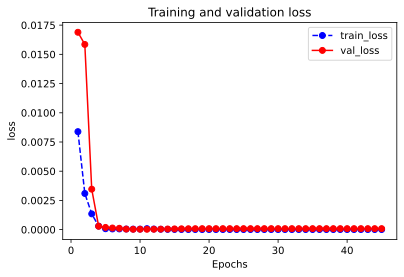

In [61]:
plot_metric(dfhistory,"loss")

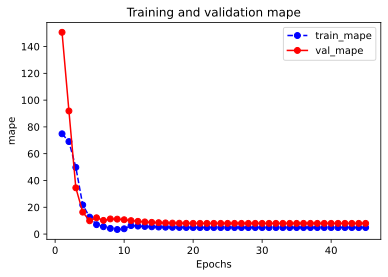

In [62]:
plot_metric(dfhistory,"mape")

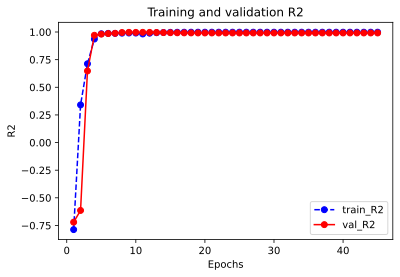

In [63]:
plot_metric(dfhistory,"R2")

In [ ]:
#使用最佳保存点进行评估
trainer.test(model,ckpt_path='best', dataloaders=d_test, verbose = False)

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/lightning_logs/version_1/checkpoints/epoch=51-step=10036.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from checkpoint at /content/lightning_logs/version_1/checkpoints/epoch=51-step=10036.ckpt
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:492: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  category=PossibleUserWarning,


Testing: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


{'test_loss': 5.1817169189453125, 'test_mape': 0.11257193982601166}


[{'test_loss': 5.1817169189453125, 'test_mape': 0.11257193982601166}]

In [ ]:
data,label = next(iter(d_test))
print(label)
model.eval()
prediction = model(data)
print(prediction)
print(mape(prediction,label))

In [ ]:
mspe(prediction,label)

tensor(257.6396, grad_fn=<MeanBackward0>)

In [ ]:
# 获取恢复了权重和超参数等的模型
model = model.load_from_checkpoint(checkpoint_path='/content/lightning_logs/version_22/checkpoints/epoch=6-step=1736.ckpt')
# 修改测试时需要的参数，例如预测的步数等
model.pred_step = 1000
# 定义trainer, 其中limit_test_batches表示取测试集中的0.05的数据来做测试
trainer = pl.Trainer(gpus=0, precision=16, limit_test_batches=0.5)
# 测试，自动调用test_step(), 其中dm为数据集，放在下面讲
trainer.test(model, dataloaders=d_test)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:719: UserWarning: You passed `Trainer(accelerator='cpu', precision=16)` but native AMP is not supported on CPU. Using `precision='bf16'` instead.
  "You passed `Trainer(accelerator='cpu', precision=16)` but native AMP is not supported on CPU."
INFO:pytorch_lightning.utilities.rank_zero:Using bfloat16 Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


RuntimeError: ignored

In [ ]:
num_epoch=100
loss = nn.MSELoss()
for epoch in range(num_epoch):
    for x,y in d_train:
        pre=net(x)
        l = loss(pre,y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()

In [ ]:
model = model.load_from_checkpoint("/content/lightning_logs/version_0/checkpoints/epoch=8-step=1863.ckpt")

# disable randomness, dropout, etc...
o=[]
t=[]
model.eval()
with torch.no_grad():
    # 获取测试数据
    for times, dt in enumerate(data_val_iter):
        x_test, y_test = dt
        output = model(x_test)
        # 清零，重新记录
        o[times*len(y_test) : (times+1)*len(y_test)] = output.numpy().reshape(20,-1)
        t[times*len(y_test) : (times+1)*len(y_test)] = y_test.numpy()

In [64]:
#model = LightModel.load_from_checkpoint("/content/lightning_logs/version_1/checkpoints/epoch=68-step=13317.ckpt")
o=[]
t=[]
model.eval()
with torch.no_grad():
    # 获取测试数据
    for times, dt in enumerate(data_test_iter):
        x_test, y_test = dt
        output = model(x_test)
        # 清零，重新记录
        o[times*len(y_test) : (times+1)*len(y_test)] = output.numpy().reshape(20,-1)
        t[times*len(y_test) : (times+1)*len(y_test)] = y_test.numpy()

In [ ]:
print(o)

[0.527266, 0.49519753, 0.57792044, 0.5237038, 0.32484102, 0.47868696, 0.18205844, 0.4152282, 0.44786665, 0.56205726, 0.3854638, 0.5609133, 0.2703657, 0.6037365, 0.5443281, 0.62400866, 0.7188637, 0.26577792, 0.4588273, 0.42370543, 0.43215418, 0.42792186, 0.3288109, 0.16757727, 0.2018493, 0.32434088, 0.45353416, 0.6219797, 0.5301362, 0.5446769, 0.53220606, 0.46779618, 0.6922306, 0.6677737, 0.6934062, 0.5445676, 0.6203104, 0.67255867, 0.67018807, 0.6609075, 0.6980672, 0.5634757, 0.6083952, 0.3049535, 0.39717272, 0.1697934, 0.592289, 0.46384567, 0.17699885, 0.06593782, 0.09118579, 0.4006422, 0.4943752, 0.28133327, 0.14034759, 0.29615447, 0.2613104, 0.482457, 0.2975422, 0.6947901, 0.42538312, 0.47429273, 0.5861145, 0.4921213, 0.44582692, 0.57628644, 0.5149521, 0.4389231, 0.28758112, 0.512094, 0.555442, 0.5598272, 0.5895448, 0.40244853, 0.38659015, 0.37422305, 0.41482782, 0.4718196, 0.47057584, 0.63842845, 0.2367942, 0.30041555, 0.46960667, 0.5826732, 0.607445, 0.5794848, 0.66033995, 0.69421

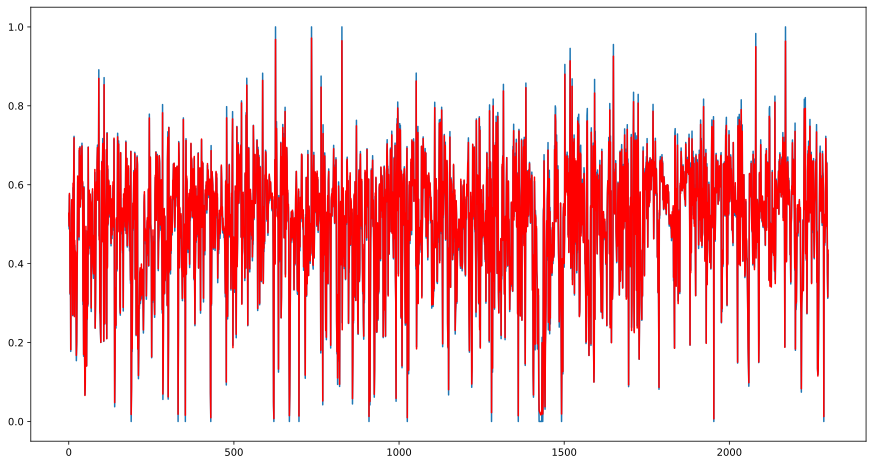

In [ ]:
import matplotlib.pyplot as plt
plt.figure(num=3, figsize=(15,8))
plt.plot(t)
plt.plot(o, color = 'red')

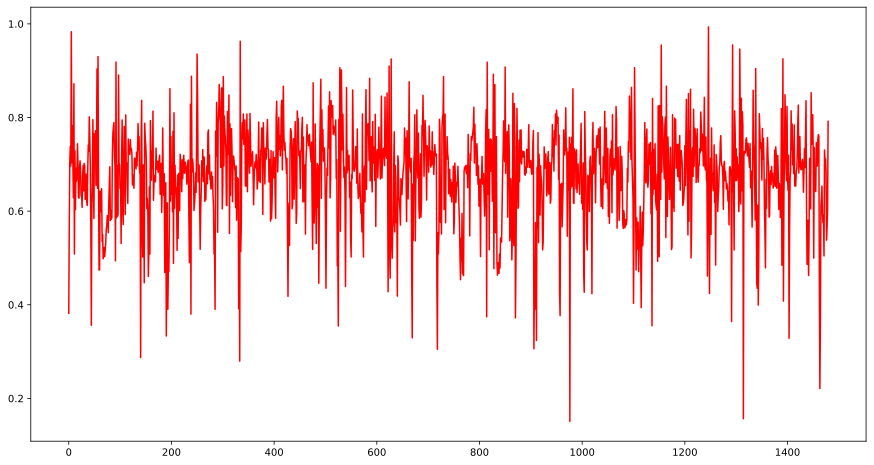

In [ ]:
plt.figure(num=3, figsize=(15,8))
plt.plot(o, color = 'red')

In [65]:
o=[]
t=[]
model.eval()
with torch.no_grad():
    # 获取测试数据
    for times, dt in enumerate(data_test_iter):
        x_test, y_test = dt
        output = model(x_test)
        # 清零，重新记录
        o[times*len(y_test) : (times+1)*len(y_test)] = output.numpy().reshape(20,-1)
        t[times*len(y_test) : (times+1)*len(y_test)] = y_test.numpy()

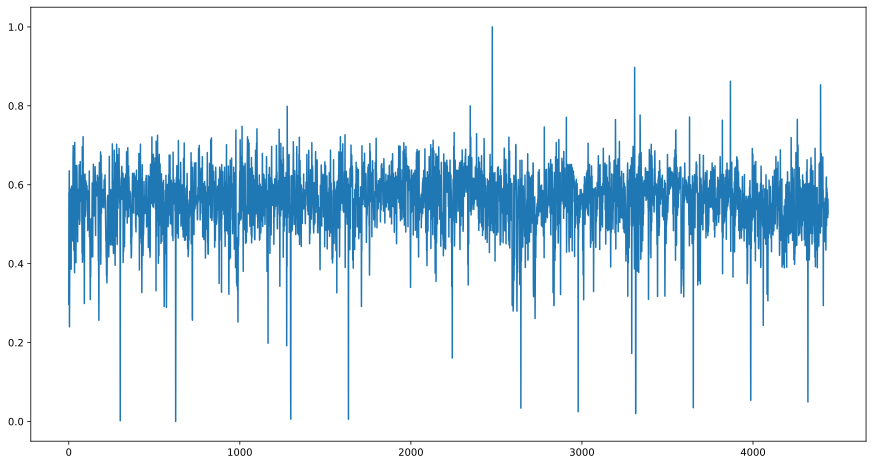

In [66]:
plt.figure(num=3, figsize=(15,8))
plt.plot(t)

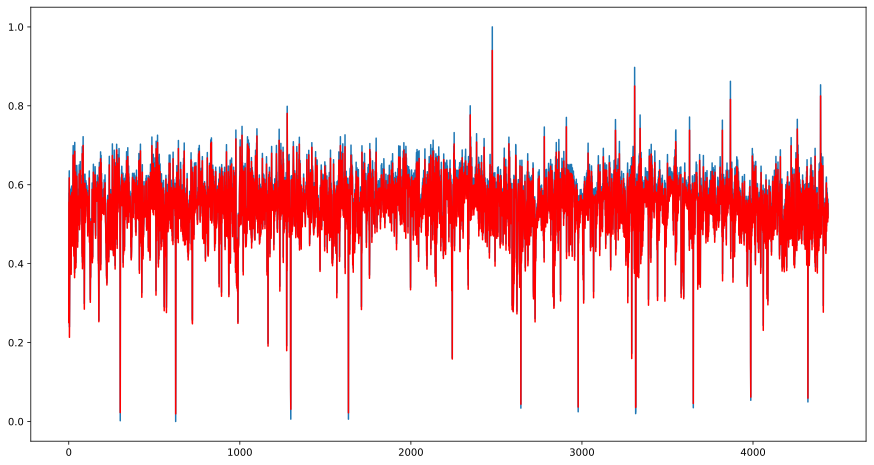

In [67]:
import matplotlib.pyplot as plt
plt.figure(num=3, figsize=(15,8))
plt.plot(t)
plt.plot(o, color = 'red')

In [ ]:
checkpoint = torch.load("/content/lightning_logs/version_1/checkpoints/epoch=14-step=2895.ckpt")
model.load_state_dict(checkpoint["state_dict"])
model.eval()
with torch.no_grad():
    for x,y in 
    y_hat = model()

LightModel(
  (net): LSTM_new(
    (lstm): LSTM(14, 32, num_layers=5, batch_first=True, dropout=0.1)
    (lstm2): LSTM(32, 16, num_layers=2, batch_first=True)
    (dropout): Dropout(p=0.2, inplace=False)
    (flatten): Flatten(start_dim=1, end_dim=2)
    (linear): Linear(in_features=64, out_features=1, bias=True)
    (relu): ReLU()
  )
  (train_metrics): ModuleDict(
    (mape): MeanAbsolutePercentageError()
  )
  (val_metrics): ModuleDict(
    (mape): MeanAbsolutePercentageError()
  )
  (test_metrics): ModuleDict(
    (mape): MeanAbsolutePercentageError()
  )
)

In [ ]:
from sklearn import metrics

In [36]:
def inverse_transform_col(scaler,y,n_col):
    '''scaler是对包含多个feature的X拟合的,y对应其中一个feature,n_col为y在X中对应的列编号.返回y的反归一化结果'''
    y = y.copy()
    y -= scaler.min_[n_col]
    y /= scaler.scale_[n_col]
    return y


In [68]:
o_data = inverse_transform_col(model_vf,o,n_col=13)
t_data = inverse_transform_col(model_vf,t,n_col=13)
orgin_data = dv['NOX排放量(折算值,mg/m3)']

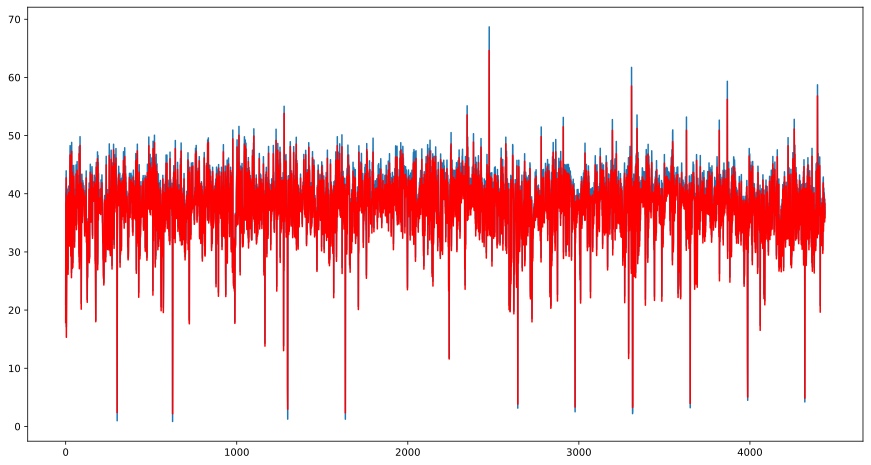

In [69]:
import matplotlib.pyplot as plt
plt.figure(num=3, figsize=(15,8))
plt.plot(t_data)
plt.plot(o_data, color = 'red')
#plt.plot(orgin_data, color = 'green')

In [70]:
mean_absolute_percentage_error(torch.Tensor(o_data), torch.Tensor(t_data))

tensor(0.0253)

In [40]:
from torchmetrics.functional import mean_absolute_percentage_error
mean_absolute_percentage_error(torch.Tensor(o_data), torch.Tensor(t_data))

NameError: ignored

In [ ]:
from torchmetrics.functional import mean_absolute_percentage_error

mean_absolute_percentage_error(torch.Tensor(o), torch.Tensor(t))

tensor(153.8594)

In [ ]:
def rmse(y_pred,y_true):
    criterion = nn.MSELoss()
    loss = torch.sqrt(criterion(y_pred, y_true))
    return torch.mean(loss)

In [43]:
num_feature = 14
hidden_num = 124
hidden_num2 = 32
mem_day = 4
out_channels = 72
net_CNN = CNN_LSTM(num_feature,hidden_num,hidden_num2, mem_day,out_channels) 
loss_fn = rmse
metric_dict = {"mape":MeanAbsolutePercentageError(), "R2":R2Score()}

optimizer = torch.optim.Adam(net_CNN.parameters(), lr=0.01)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.0001)

model_CNN = LightModel(net_CNN,
       loss_fn = loss_fn,
       metrics_dict= metric_dict,
       optimizer = optimizer,
       lr_scheduler = lr_scheduler)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/parsing.py:263: UserWarning: Attribute 'net' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['net'])`.
  f"Attribute {k!r} is an instance of `nn.Module` and is already saved during checkpointing."


In [44]:
import pytorch_lightning as pl     

#1，设置回调函数

model_ckpt = pl.callbacks.ModelCheckpoint(
    monitor='val_R2',
    save_top_k=1,
    mode='max'
)

early_stopping = pl.callbacks.EarlyStopping(monitor = 'val_loss',
                           patience=20,
                           mode = 'min'
                          )
#stochasticWeightAveraging = pl.callbacks.StochasticWeightAveraging(swa_lrs=1e-2)
#2，设置训练参数
# gpus=0 则使用cpu训练，gpus=1则使用1个gpu训练，gpus=2则使用2个gpu训练，gpus=-1则使用所有gpu训练，
# gpus=[0,1]则指定使用0号和1号gpu训练， gpus="0,1,2,3"则使用0,1,2,3号gpu训练
# tpus=1 则使用1个tpu训练
trainer = pl.Trainer(logger=True,
                     #check_val_every_n_epoch=3,
                     min_epochs=20,max_epochs=200,
                     gpus=0,
                     callbacks = [model_ckpt,early_stopping],
                     enable_progress_bar = True) 

##3，启动训练循环
trainer.fit(model_CNN,data_train_iter,data_val_iter)
#trainer.save_checkpoint("best_model.ckpt")

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:447: LightningDeprecationWarning: Setting `Trainer(gpus=0)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=0)` instead.
  f"Setting `Trainer(gpus={gpus!r})` is deprecated in v1.7 and will be removed"
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type       | Params
---------------------------------------------
0 | net           | CNN_LSTM   | 99.0 K
1 | train_metrics | ModuleDict | 0     
2 | val_metrics   | ModuleDict | 0     
3 | test_metrics  | ModuleDict | 0     
-----------------------------------

Sanity Checking: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:44:02
{'epoch': 0, 'val_loss': 0.5249654054641724, 'val_mape': 1.047795295715332, 'val_R2': -10.394268035888672}


<<<<<< reach best val_R2 : -10.394268035888672 >>>>>>


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:44:11
{'epoch': 0, 'val_loss': 0.07929600775241852, 'val_mape': 1769.6007080078125, 'val_R2': 0.7476271390914917}
{'epoch': 0, 'train_loss': 0.13505232334136963, 'train_mape': 3097.477294921875, 'train_R2': 0.06778603792190552}


<<<<<< reach best val_R2 : 0.7476271390914917 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:44:20
{'epoch': 1, 'val_loss': 0.05751114711165428, 'val_mape': 845.22509765625, 'val_R2': 0.8657739162445068}
{'epoch': 1, 'train_loss': 0.06661321222782135, 'train_mape': 1002.375732421875, 'train_R2': 0.786845862865448}


<<<<<< reach best val_R2 : 0.8657739162445068 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:44:30
{'epoch': 2, 'val_loss': 0.03449859097599983, 'val_mape': 699.9910278320312, 'val_R2': 0.9496065974235535}
{'epoch': 2, 'train_loss': 0.0451960526406765, 'train_mape': 585.6941528320312, 'train_R2': 0.9016809463500977}


<<<<<< reach best val_R2 : 0.9496065974235535 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:44:38
{'epoch': 3, 'val_loss': 0.05101797729730606, 'val_mape': 1243.1273193359375, 'val_R2': 0.8952054977416992}
{'epoch': 3, 'train_loss': 0.04048243537545204, 'train_mape': 529.6845703125, 'train_R2': 0.9204967021942139}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:44:47
{'epoch': 4, 'val_loss': 0.038286242634058, 'val_mape': 388.4044494628906, 'val_R2': 0.9387139081954956}
{'epoch': 4, 'train_loss': 0.04677962511777878, 'train_mape': 461.7023620605469, 'train_R2': 0.888672411441803}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:44:56
{'epoch': 5, 'val_loss': 0.028873713687062263, 'val_mape': 120.32704162597656, 'val_R2': 0.9643554091453552}
{'epoch': 5, 'train_loss': 0.033374086022377014, 'train_mape': 309.97705078125, 'train_R2': 0.9436880350112915}


<<<<<< reach best val_R2 : 0.9643554091453552 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:45:05
{'epoch': 6, 'val_loss': 0.024410130456089973, 'val_mape': 284.4117736816406, 'val_R2': 0.9745627641677856}
{'epoch': 6, 'train_loss': 0.03128224238753319, 'train_mape': 270.2498474121094, 'train_R2': 0.952264666557312}


<<<<<< reach best val_R2 : 0.9745627641677856 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:45:15
{'epoch': 7, 'val_loss': 0.021775946021080017, 'val_mape': 143.4247589111328, 'val_R2': 0.9800969362258911}
{'epoch': 7, 'train_loss': 0.0305436160415411, 'train_mape': 257.98321533203125, 'train_R2': 0.9535298943519592}


<<<<<< reach best val_R2 : 0.9800969362258911 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:45:25
{'epoch': 8, 'val_loss': 0.0203388724476099, 'val_mape': 136.4404754638672, 'val_R2': 0.9806208610534668}
{'epoch': 8, 'train_loss': 0.02866463176906109, 'train_mape': 200.60836791992188, 'train_R2': 0.9595081806182861}


<<<<<< reach best val_R2 : 0.9806208610534668 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:45:33
{'epoch': 9, 'val_loss': 0.01991993747651577, 'val_mape': 54.3408317565918, 'val_R2': 0.9834710359573364}
{'epoch': 9, 'train_loss': 0.025711489841341972, 'train_mape': 184.1549835205078, 'train_R2': 0.9658088088035583}


<<<<<< reach best val_R2 : 0.9834710359573364 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:45:42
{'epoch': 10, 'val_loss': 0.01897141896188259, 'val_mape': 56.09764099121094, 'val_R2': 0.9849469065666199}
{'epoch': 10, 'train_loss': 0.016387946903705597, 'train_mape': 62.947776794433594, 'train_R2': 0.9879106879234314}


<<<<<< reach best val_R2 : 0.9849469065666199 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:45:51
{'epoch': 11, 'val_loss': 0.01813647150993347, 'val_mape': 57.93033981323242, 'val_R2': 0.9861950874328613}
{'epoch': 11, 'train_loss': 0.015596064738929272, 'train_mape': 63.02890396118164, 'train_R2': 0.9890196919441223}


<<<<<< reach best val_R2 : 0.9861950874328613 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:46:01
{'epoch': 12, 'val_loss': 0.017439894378185272, 'val_mape': 59.822608947753906, 'val_R2': 0.987200915813446}
{'epoch': 12, 'train_loss': 0.01494299340993166, 'train_mape': 63.31130599975586, 'train_R2': 0.9898896813392639}


<<<<<< reach best val_R2 : 0.987200915813446 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:46:11
{'epoch': 13, 'val_loss': 0.016866257414221764, 'val_mape': 61.47846603393555, 'val_R2': 0.9880055785179138}
{'epoch': 13, 'train_loss': 0.014413638971745968, 'train_mape': 63.564453125, 'train_R2': 0.9905646443367004}


<<<<<< reach best val_R2 : 0.9880055785179138 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:46:19
{'epoch': 14, 'val_loss': 0.0163996871560812, 'val_mape': 62.89851760864258, 'val_R2': 0.9886450171470642}
{'epoch': 14, 'train_loss': 0.013992653228342533, 'train_mape': 63.78450393676758, 'train_R2': 0.991082489490509}


<<<<<< reach best val_R2 : 0.9886450171470642 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:46:28
{'epoch': 15, 'val_loss': 0.016025913879275322, 'val_mape': 64.15800476074219, 'val_R2': 0.989147961139679}
{'epoch': 15, 'train_loss': 0.013664930127561092, 'train_mape': 64.01527404785156, 'train_R2': 0.9914746880531311}


<<<<<< reach best val_R2 : 0.989147961139679 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:46:37
{'epoch': 16, 'val_loss': 0.01572977751493454, 'val_mape': 65.24066925048828, 'val_R2': 0.9895408749580383}
{'epoch': 16, 'train_loss': 0.013414678163826466, 'train_mape': 64.34735107421875, 'train_R2': 0.9917684197425842}


<<<<<< reach best val_R2 : 0.9895408749580383 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:46:46
{'epoch': 17, 'val_loss': 0.015496673062443733, 'val_mape': 66.15492248535156, 'val_R2': 0.9898470044136047}
{'epoch': 17, 'train_loss': 0.013226157054305077, 'train_mape': 64.7220230102539, 'train_R2': 0.9919872879981995}


<<<<<< reach best val_R2 : 0.9898470044136047 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:46:57
{'epoch': 18, 'val_loss': 0.015313953161239624, 'val_mape': 66.88677978515625, 'val_R2': 0.9900851249694824}
{'epoch': 18, 'train_loss': 0.013084723614156246, 'train_mape': 65.03323364257812, 'train_R2': 0.9921506643295288}


<<<<<< reach best val_R2 : 0.9900851249694824 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:47:06
{'epoch': 19, 'val_loss': 0.015170545317232609, 'val_mape': 67.29383087158203, 'val_R2': 0.9902709722518921}
{'epoch': 19, 'train_loss': 0.01297836471349001, 'train_mape': 65.27200317382812, 'train_R2': 0.9922733902931213}


<<<<<< reach best val_R2 : 0.9902709722518921 >>>>>>


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:47:16
{'epoch': 20, 'val_loss': 0.01517054345458746, 'val_mape': 67.2938232421875, 'val_R2': 0.9902709722518921}
{'epoch': 20, 'train_loss': 0.012931019999086857, 'train_mape': 65.20907592773438, 'train_R2': 0.9923300743103027}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:47:24
{'epoch': 21, 'val_loss': 0.01517054345458746, 'val_mape': 67.29381561279297, 'val_R2': 0.9902709722518921}
{'epoch': 21, 'train_loss': 0.012931019999086857, 'train_mape': 65.2090835571289, 'train_R2': 0.9923300743103027}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:47:33
{'epoch': 22, 'val_loss': 0.01517054345458746, 'val_mape': 67.29381561279297, 'val_R2': 0.9902709722518921}
{'epoch': 22, 'train_loss': 0.012931019999086857, 'train_mape': 65.2090835571289, 'train_R2': 0.9923300743103027}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:47:43
{'epoch': 23, 'val_loss': 0.01517054345458746, 'val_mape': 67.29381561279297, 'val_R2': 0.9902709722518921}
{'epoch': 23, 'train_loss': 0.012931019999086857, 'train_mape': 65.2090835571289, 'train_R2': 0.9923300743103027}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:47:53
{'epoch': 24, 'val_loss': 0.015170545317232609, 'val_mape': 67.29380798339844, 'val_R2': 0.9902709722518921}
{'epoch': 24, 'train_loss': 0.012931019999086857, 'train_mape': 65.2090835571289, 'train_R2': 0.9923300743103027}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:48:02
{'epoch': 25, 'val_loss': 0.015170545317232609, 'val_mape': 67.29380798339844, 'val_R2': 0.9902709722518921}
{'epoch': 25, 'train_loss': 0.012931019999086857, 'train_mape': 65.20909118652344, 'train_R2': 0.9923300743103027}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:48:12
{'epoch': 26, 'val_loss': 0.015170545317232609, 'val_mape': 67.2938003540039, 'val_R2': 0.9902709722518921}
{'epoch': 26, 'train_loss': 0.012931019999086857, 'train_mape': 65.20909118652344, 'train_R2': 0.9923300743103027}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:48:21
{'epoch': 27, 'val_loss': 0.015170545317232609, 'val_mape': 67.29380798339844, 'val_R2': 0.9902709126472473}
{'epoch': 27, 'train_loss': 0.012931019999086857, 'train_mape': 65.20909118652344, 'train_R2': 0.9923300743103027}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:48:30
{'epoch': 28, 'val_loss': 0.015170545317232609, 'val_mape': 67.29380798339844, 'val_R2': 0.9902709126472473}
{'epoch': 28, 'train_loss': 0.012931019067764282, 'train_mape': 65.2090835571289, 'train_R2': 0.9923300743103027}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:48:40
{'epoch': 29, 'val_loss': 0.01517054345458746, 'val_mape': 67.29380798339844, 'val_R2': 0.9902709126472473}
{'epoch': 29, 'train_loss': 0.012931019999086857, 'train_mape': 65.20907592773438, 'train_R2': 0.992330014705658}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:48:50
{'epoch': 30, 'val_loss': 0.01517054345458746, 'val_mape': 67.29380798339844, 'val_R2': 0.9902709126472473}
{'epoch': 30, 'train_loss': 0.012931019999086857, 'train_mape': 65.20907592773438, 'train_R2': 0.992330014705658}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:48:59
{'epoch': 31, 'val_loss': 0.01517054345458746, 'val_mape': 67.29380798339844, 'val_R2': 0.9902709126472473}
{'epoch': 31, 'train_loss': 0.012931019999086857, 'train_mape': 65.20907592773438, 'train_R2': 0.992330014705658}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:49:09
{'epoch': 32, 'val_loss': 0.01517054345458746, 'val_mape': 67.29380798339844, 'val_R2': 0.9902709126472473}
{'epoch': 32, 'train_loss': 0.012931019999086857, 'train_mape': 65.20907592773438, 'train_R2': 0.992330014705658}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:49:18
{'epoch': 33, 'val_loss': 0.01517054345458746, 'val_mape': 67.29380798339844, 'val_R2': 0.9902709126472473}
{'epoch': 33, 'train_loss': 0.012931019999086857, 'train_mape': 65.20907592773438, 'train_R2': 0.992330014705658}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:49:28
{'epoch': 34, 'val_loss': 0.01517054345458746, 'val_mape': 67.29380798339844, 'val_R2': 0.9902709126472473}
{'epoch': 34, 'train_loss': 0.012931019999086857, 'train_mape': 65.20907592773438, 'train_R2': 0.992330014705658}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:49:37
{'epoch': 35, 'val_loss': 0.01517054345458746, 'val_mape': 67.29380798339844, 'val_R2': 0.9902709126472473}
{'epoch': 35, 'train_loss': 0.012931019999086857, 'train_mape': 65.20907592773438, 'train_R2': 0.992330014705658}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:49:47
{'epoch': 36, 'val_loss': 0.01517054345458746, 'val_mape': 67.29380798339844, 'val_R2': 0.9902709126472473}
{'epoch': 36, 'train_loss': 0.012931019999086857, 'train_mape': 65.20907592773438, 'train_R2': 0.992330014705658}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:49:57
{'epoch': 37, 'val_loss': 0.01517054345458746, 'val_mape': 67.29380798339844, 'val_R2': 0.9902709126472473}
{'epoch': 37, 'train_loss': 0.012931019999086857, 'train_mape': 65.20907592773438, 'train_R2': 0.992330014705658}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:50:06
{'epoch': 38, 'val_loss': 0.01517054345458746, 'val_mape': 67.29380798339844, 'val_R2': 0.9902709126472473}
{'epoch': 38, 'train_loss': 0.012931019999086857, 'train_mape': 65.20907592773438, 'train_R2': 0.992330014705658}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:50:15
{'epoch': 39, 'val_loss': 0.01517054345458746, 'val_mape': 67.29380798339844, 'val_R2': 0.9902709126472473}
{'epoch': 39, 'train_loss': 0.012931019999086857, 'train_mape': 65.20907592773438, 'train_R2': 0.992330014705658}


Validation: 0it [00:00, ?it/s]


================================================================================2022-11-14 01:50:25
{'epoch': 40, 'val_loss': 0.01517054345458746, 'val_mape': 67.29380798339844, 'val_R2': 0.9902709126472473}
{'epoch': 40, 'train_loss': 0.012931019999086857, 'train_mape': 65.20907592773438, 'train_R2': 0.992330014705658}


In [51]:
dfhistory_cnn = model_CNN.get_history() 
dfhistory_cnn 

,epoch,val_loss,val_mape,val_R2,train_loss,train_mape,train_R2
0,0,0.079296,1769.600708,0.747627,0.135052,3097.477295,0.067786
1,1,0.057511,845.225098,0.865774,0.066613,1002.375732,0.786846
2,2,0.034499,699.991028,0.949607,0.045196,585.694153,0.901681
3,3,0.051018,1243.127319,0.895205,0.040482,529.684570,0.920497
4,4,0.038286,388.404449,0.938714,0.046780,461.702362,0.888672
5,5,0.028874,120.327042,0.964355,0.033374,309.977051,0.943688
6,6,0.024410,284.411774,0.974563,0.031282,270.249847,0.952265
7,7,0.021776,143.424759,0.980097,0.030544,257.983215,0.953530
8,8,0.020339,136.440475,0.980621,0.028665,200.608368,0.959508
9,9,0.019920,54.340832,0.983471,0.025711,184.154984,0.965809


In [32]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(dfhistory, metric):
    train_metrics = dfhistory["train_"+metric]
    val_metrics = dfhistory['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

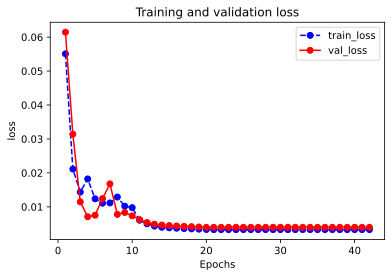

In [33]:
plot_metric(dfhistory_cnn,"loss")

In [52]:
o_cnn=[]
t_cnn=[]
model_CNN.eval()
with torch.no_grad():
    # 获取测试数据
    for times, dt in enumerate(data_test_iter):
        x_test, y_test = dt
        output = model_CNN(x_test)
        # 清零，重新记录
        o_cnn[times*len(y_test) : (times+1)*len(y_test)] = output.numpy().reshape(20,-1)
        t_cnn[times*len(y_test) : (times+1)*len(y_test)] = y_test.numpy()

In [53]:
o_cnn_data = inverse_transform_col(model_vf,o_cnn,n_col=13)
t_cnn_data = inverse_transform_col(model_vf,t_cnn,n_col=13)

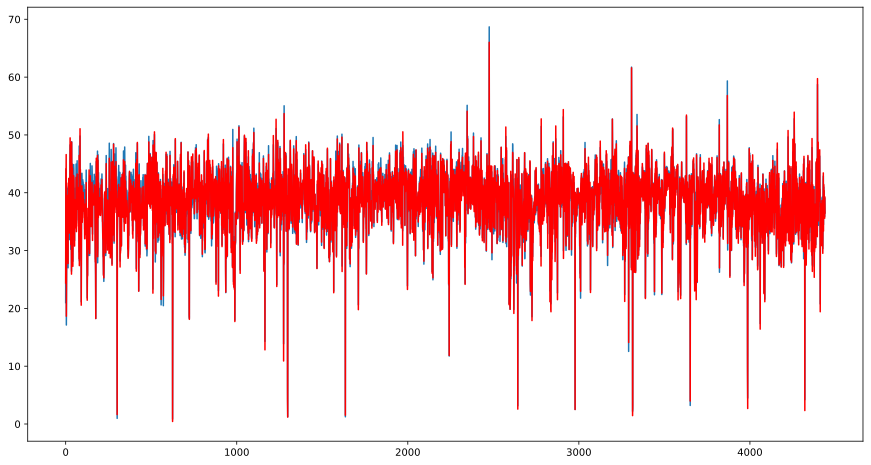

In [54]:
import matplotlib.pyplot as plt
plt.figure(num=3, figsize=(15,8))
plt.plot(t_cnn_data)
plt.plot(o_cnn_data, color = 'red')

In [55]:
from torchmetrics.functional import mean_absolute_percentage_error
mean_absolute_percentage_error(torch.Tensor(o_cnn_data), torch.Tensor(t_cnn_data))

tensor(0.0168)